In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, metrics, tree
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, explained_variance_score, classification_report

In [4]:
sns.set_style("whitegrid")
sns.set_context("paper",font_scale=1.0)
%matplotlib inline
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [5]:
dtrain = pd.read_csv('train.csv')
dtrain.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.00,4.00,3.00,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.00,7,11.27,4.00,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.00,4.00,3.00,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.00,NaN,11.27,4.00,Good,809.98,31.94,NaN,No,49.57,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3.00,4.00,3.00,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.00,7,_,4.00,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.00,4.00,3.00,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.00,4,6.27,4.00,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3.00,4.00,3.00,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.00,NaN,11.27,4.00,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
dtrain.columns = [x.lower() for x in dtrain.columns]

In [7]:
dtrain.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [8]:
dtrain.shape

(47201, 28)

In [9]:
dtrain.drop(['id','customer_id','month','name','ssn','type_of_loan','credit_history_age'], axis=1, inplace=True)

In [10]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47201 entries, 0 to 47200
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       47201 non-null  object 
 1   occupation                47200 non-null  object 
 2   annual_income             47200 non-null  object 
 3   monthly_inhand_salary     40153 non-null  float64
 4   num_bank_accounts         47200 non-null  float64
 5   num_credit_card           47200 non-null  float64
 6   interest_rate             47200 non-null  float64
 7   num_of_loan               47200 non-null  object 
 8   delay_from_due_date       47200 non-null  float64
 9   num_of_delayed_payment    43922 non-null  object 
 10  changed_credit_limit      47200 non-null  object 
 11  num_credit_inquiries      46303 non-null  float64
 12  credit_mix                47200 non-null  object 
 13  outstanding_debt          47200 non-null  object 
 14  credit

In [11]:
dtrain.duplicated().value_counts()

False    47201
dtype: int64

In [12]:
dtrain.isnull().sum().reset_index().rename(columns={'index':'feature_name', 0:'null_counts'})

,feature_name,null_counts
0,age,0
1,occupation,1
2,annual_income,1
3,monthly_inhand_salary,7048
4,num_bank_accounts,1
5,num_credit_card,1
6,interest_rate,1
7,num_of_loan,1
8,delay_from_due_date,1
9,num_of_delayed_payment,3279


In [13]:
size_before_cleaning = dtrain.shape
dtrain = dtrain[dtrain.isnull().sum(axis=1)<3]
print("{} Record dropped".format(size_before_cleaning[0] - dtrain.shape[0]))

47 Record dropped


In [15]:
dtrain['occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [16]:
dtrain['credit_mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [17]:
dtrain['payment_behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [18]:
def amount_invested_monthly(col):
  if "__" in str(col):
    return str(col).split("__")[1]
  else:
    return str(col)

In [19]:
dtrain["amount_invested_monthly"]=dtrain["amount_invested_monthly"].apply(amount_invested_monthly)
dtrain["amount_invested_monthly"]=dtrain["amount_invested_monthly"].astype("float")

In [20]:
dtrain.tail()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
47195,49,Media_Manager,70793.38,6103.45,5.00,3.00,8.00,1,22.00,19,9.68,NaN,Standard,138.21,35.88,NM,51.13,100.77,High_spent_Large_value_payments,698.4491433748742,Standard
47196,49,Media_Manager,70793.38,6103.45,5.00,3.00,8.00,1,22.00,21,9.68,3.00,Standard,138.21,28.26,No,51.13,306.04,High_spent_Small_value_payments,513.1807847081117,Standard
47197,49,Media_Manager,70793.38_,6103.45,5.00,3.00,8.00,1,26.00,18,_,3.00,Standard,138.21,24.57,No,51.13,584.14,Low_spent_Medium_value_payments,255.07953523803826,Standard
47198,49,Media_Manager,70793.38,NaN,5.00,3.00,8.00,1,22.00,17,9.68,7.00,_,138.21,38.54,No,51.13,135.01,High_spent_Large_value_payments,664.211302267013,Standard
47199,49,Media_Manager,70793.38,6103.45,5.00,3.00,8.00,1,22.00,18,9.68,7.00,_,138.21,26.71,No,51.13,415.22,Low_spent_Medium_value_payments,423.99953665444235,Standard


In [21]:
def filter_delayed_payments(value):
  if "__" in str(value):
    return str(value).split("__")[1]
  elif '_' in str(value):
    return str(value).replace("_","")
  elif str(value) == '_':
    return str(value)
  else:
    return str(value)

In [22]:
dtrain["num_of_delayed_payment"]=dtrain["num_of_delayed_payment"].apply(filter_delayed_payments)
dtrain["num_of_delayed_payment"]=dtrain["num_of_delayed_payment"].astype("float")

In [23]:
def filter_general(value):
  if '-' in str(value):
    return str(value).split('-')[1]
  elif '_' in str(value):
    return str(value).split('_')[0]
  else:
    return str(value)

In [24]:
dtrain.drop(dtrain[dtrain["monthly_balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['age', 'annual_income', 'num_of_loan', 'outstanding_debt', 'monthly_balance']:
  dtrain[i]=dtrain[i].apply(filter_general)
  dtrain[i]=dtrain[i].astype(np.float64)
  print(i+"Successfully Cleaned")

ageSuccessfully Cleaned
annual_incomeSuccessfully Cleaned
num_of_loanSuccessfully Cleaned
outstanding_debtSuccessfully Cleaned
monthly_balanceSuccessfully Cleaned


In [25]:
dtrain["changed_credit_limit"]=dtrain["changed_credit_limit"].apply(lambda x:x.split("-")[-1])
dtrain.drop(dtrain[dtrain["changed_credit_limit"]=="_"].index, inplace=True)
dtrain["changed_credit_limit"]=dtrain["changed_credit_limit"].astype("float")

In [26]:
dtrain['occupation']=dtrain['occupation'].replace('_______',np.nan)
dtrain['occupation']=dtrain['occupation'].fillna(np.random.choice(pd.Series(['Scientist','Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [27]:
dtrain['credit_mix']=dtrain['credit_mix'].replace('_',np.nan)
dtrain['credit_mix']=dtrain['credit_mix'].fillna(np.random.choice(pd.Series(['Good', 'Standard', 'Bad'])))

In [28]:
dtrain['payment_of_min_amount']=dtrain['payment_of_min_amount'].replace('_',np.nan)
dtrain['payment_of_min_amount']=dtrain['payment_of_min_amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [29]:
dtrain['payment_behaviour']=dtrain['payment_behaviour'].replace('!@9#%8',np.nan)
dtrain['payment_behaviour']=dtrain['payment_behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'])))

In [30]:
for i in ['monthly_inhand_salary','num_of_delayed_payment', 'num_credit_inquiries','amount_invested_monthly','monthly_balance']:
  dtrain[i].fillna(dtrain[i].median(), inplace=True)

In [31]:
dtrain.head()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,23.00,Scientist,19114.12,1824.84,3.00,4.00,3.00,4.00,3.00,7.00,11.27,4.00,Standard,809.98,26.82,No,49.57,80.42,High_spent_Small_value_payments,312.49,Good
1,23.00,Scientist,19114.12,3104.81,3.00,4.00,3.00,4.00,-1.00,14.00,11.27,4.00,Good,809.98,31.94,No,49.57,118.28,Low_spent_Large_value_payments,284.63,Good
3,23.00,Scientist,19114.12,3104.81,3.00,4.00,3.00,4.00,5.00,4.00,6.27,4.00,Good,809.98,31.38,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good
4,23.00,Scientist,19114.12,1824.84,3.00,4.00,3.00,4.00,6.00,14.00,11.27,4.00,Good,809.98,24.80,No,49.57,41.42,High_spent_Medium_value_payments,341.49,Good
5,23.00,Scientist,19114.12,3104.81,3.00,4.00,3.00,4.00,8.00,4.00,9.27,4.00,Good,809.98,27.26,No,49.57,62.43,High_spent_Medium_value_payments,340.48,Good


In [32]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46182 entries, 0 to 47199
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       46182 non-null  float64
 1   occupation                46182 non-null  object 
 2   annual_income             46182 non-null  float64
 3   monthly_inhand_salary     46182 non-null  float64
 4   num_bank_accounts         46182 non-null  float64
 5   num_credit_card           46182 non-null  float64
 6   interest_rate             46182 non-null  float64
 7   num_of_loan               46182 non-null  float64
 8   delay_from_due_date       46182 non-null  float64
 9   num_of_delayed_payment    46182 non-null  float64
 10  changed_credit_limit      46182 non-null  float64
 11  num_credit_inquiries      46182 non-null  float64
 12  credit_mix                46182 non-null  object 
 13  outstanding_debt          46182 non-null  float64
 14  credit

In [33]:
dtrain_cat = dtrain.select_dtypes(include='object')
dtrain_num = dtrain.select_dtypes(include='number')

In [34]:
dtrain_cat.describe().T

,count,unique,top,freq
occupation,46182,15,Doctor,6044
credit_mix,46182,3,Standard,25983
payment_of_min_amount,46182,3,Yes,24231
payment_behaviour,46182,6,Low_spent_Small_value_payments,11802
credit_score,46182,3,Standard,24410


In [35]:
for cat_col in dtrain_cat:
  print(dtrain_cat[cat_col].value_counts())
  print('\n---------------------')

Doctor           6044
Architect        3043
Mechanic         2991
Scientist        2971
Lawyer           2959
Teacher          2924
Media_Manager    2880
Engineer         2862
Entrepreneur     2861
Developer        2849
Journalist       2824
Writer           2802
Manager          2801
Musician         2724
Accountant       2647
Name: occupation, dtype: int64

---------------------
Standard    25983
Good        11402
Bad          8797
Name: credit_mix, dtype: int64

---------------------
Yes    24231
No     16409
NM      5542
Name: payment_of_min_amount, dtype: int64

---------------------
Low_spent_Small_value_payments      11802
High_spent_Medium_value_payments    11627
Low_spent_Medium_value_payments      6444
High_spent_Large_value_payments      6242
High_spent_Small_value_payments      5302
Low_spent_Large_value_payments       4765
Name: payment_behaviour, dtype: int64

---------------------
Standard    24410
Poor        13541
Good         8231
Name: credit_score, dtype: int64

---

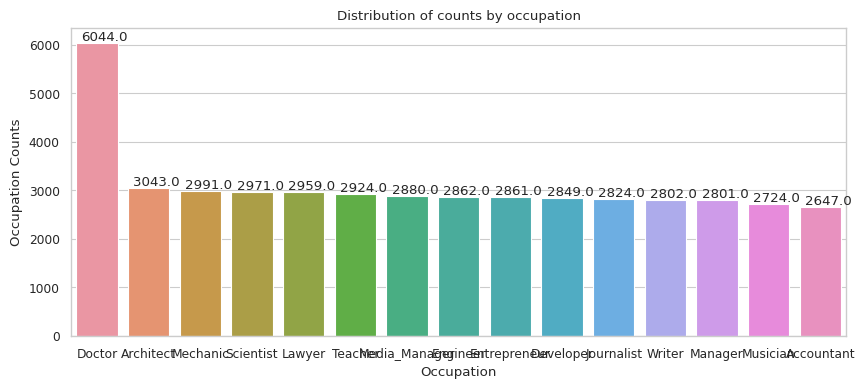

In [36]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='occupation', data=dtrain_cat, order = dtrain['occupation'].value_counts().index)
plt.title('Distribution of counts by occupation')
plt.xlabel('Occupation')
plt.ylabel('Occupation Counts')
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+50))

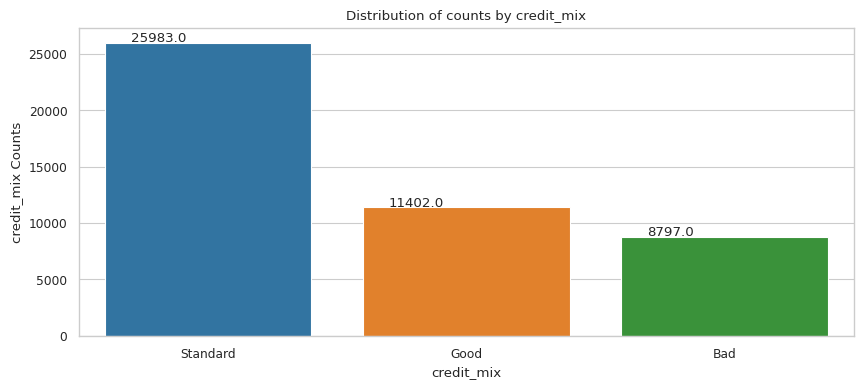

In [37]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='credit_mix', data=dtrain_cat, order = dtrain['credit_mix'].value_counts().index)
plt.title('Distribution of counts by credit_mix')
plt.xlabel('credit_mix')
plt.ylabel('credit_mix Counts')
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+50))

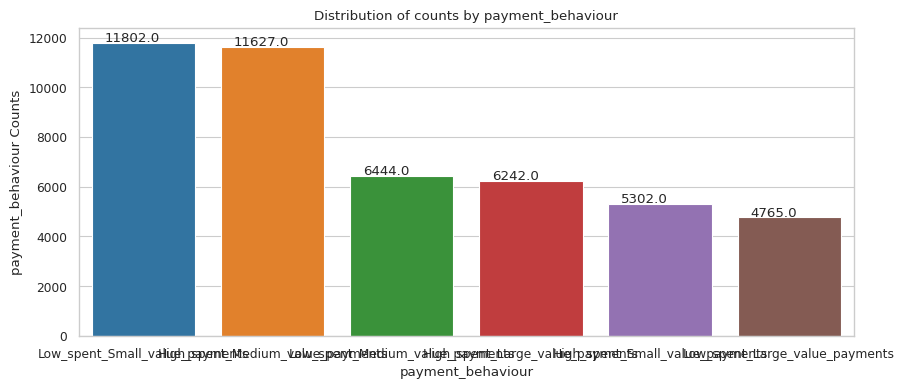

In [38]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='payment_behaviour', data=dtrain_cat, order = dtrain['payment_behaviour'].value_counts().index)
plt.title('Distribution of counts by payment_behaviour')
plt.xlabel('payment_behaviour')
plt.ylabel('payment_behaviour Counts')
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+50))

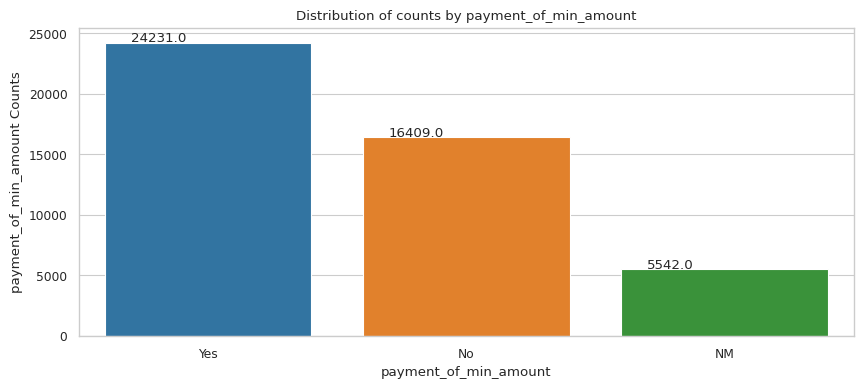

In [39]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='payment_of_min_amount', data=dtrain_cat, order = dtrain['payment_of_min_amount'].value_counts().index)
plt.title('Distribution of counts by payment_of_min_amount')
plt.xlabel('payment_of_min_amount')
plt.ylabel('payment_of_min_amount Counts')
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+50))

In [40]:
dtrain_num.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance
count,46182.00,46182.00,46182.00,46182.00,46182.00,46182.00,46182.00,46182.00,46182.00,46182.00,46182.00,46182.00,46182.00,46182.00,46182.00,46182.00
mean,116.40,173844.40,4061.46,17.09,23.19,71.53,10.61,21.11,28.62,10.41,26.02,1420.27,32.31,1420.61,608.08,402.24
std,669.11,1406293.57,2993.22,117.79,132.31,464.29,61.39,14.83,208.41,6.71,181.94,1164.02,5.12,8398.68,1979.82,212.97
min,14.00,7005.93,319.56,-1.00,0.00,1.00,0.00,-5.00,-3.00,0.00,0.00,0.54,20.00,0.00,0.00,0.09
25%,25.00,19453.05,1797.57,3.00,4.00,7.00,2.00,10.00,9.00,5.21,3.00,560.11,28.07,31.09,77.58,271.14
50%,33.00,38029.86,3104.81,6.00,6.00,13.00,3.00,18.00,14.00,9.36,6.00,1141.72,32.34,69.69,136.92,336.73
75%,42.00,73409.80,5456.75,7.00,7.00,20.00,6.00,28.00,18.00,14.75,9.00,1926.88,36.54,163.13,258.24,468.62
max,8682.00,24188807.00,15136.70,1798.00,1499.00,5788.00,1495.00,67.00,4384.00,36.97,2597.00,4998.07,50.00,82256.00,10000.00,1602.04


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'monthly_inhand_salary'}>,
        <Axes: title={'center': 'num_bank_accounts'}>],
       [<Axes: title={'center': 'num_credit_card'}>,
        <Axes: title={'center': 'interest_rate'}>,
        <Axes: title={'center': 'num_of_loan'}>,
        <Axes: title={'center': 'delay_from_due_date'}>],
       [<Axes: title={'center': 'num_of_delayed_payment'}>,
        <Axes: title={'center': 'changed_credit_limit'}>,
        <Axes: title={'center': 'num_credit_inquiries'}>,
        <Axes: title={'center': 'outstanding_debt'}>],
       [<Axes: title={'center': 'credit_utilization_ratio'}>,
        <Axes: title={'center': 'total_emi_per_month'}>,
        <Axes: title={'center': 'amount_invested_monthly'}>,
        <Axes: title={'center': 'monthly_balance'}>]], dtype=object)

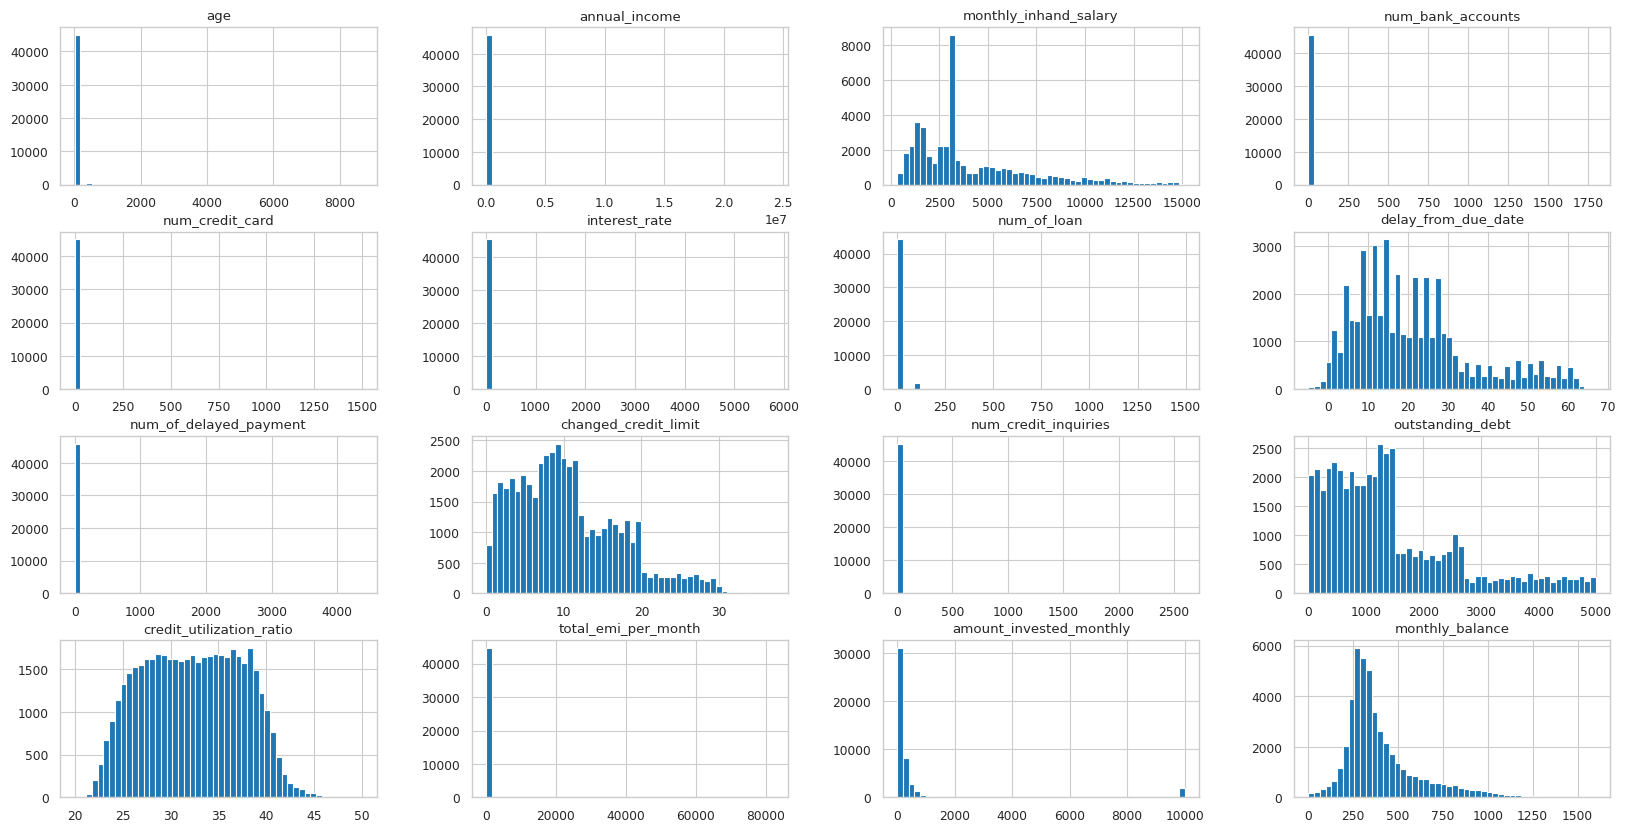

In [41]:
dtrain_num.hist(bins=50, figsize=[20,10])

In [42]:
corrmat=dtrain_num.corr()
corrmat

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance
age,1.00,-0.00,0.01,0.01,-0.00,-0.01,-0.00,-0.01,0.00,-0.00,-0.00,-0.00,0.01,0.00,-0.00,0.01
annual_income,-0.00,1.00,0.02,-0.00,0.00,-0.01,0.00,-0.01,-0.00,0.00,0.00,-0.00,0.01,-0.00,-0.01,0.02
monthly_inhand_salary,0.01,0.02,1.00,-0.01,-0.01,-0.01,-0.01,-0.23,0.00,-0.17,-0.01,-0.24,0.16,0.01,0.06,0.63
num_bank_accounts,0.01,-0.00,-0.01,1.00,0.00,-0.01,0.00,0.02,-0.00,0.02,0.00,0.03,-0.00,-0.00,0.00,-0.01
num_credit_card,-0.00,0.00,-0.01,0.00,1.00,-0.00,-0.00,0.01,0.00,0.01,-0.01,0.01,-0.00,0.01,-0.00,-0.01
interest_rate,-0.01,-0.01,-0.01,-0.01,-0.00,1.00,0.00,0.01,0.00,0.00,-0.00,0.01,0.00,0.00,-0.00,-0.01
num_of_loan,-0.00,0.00,-0.01,0.00,-0.00,0.00,1.00,0.01,0.01,0.01,0.00,0.01,-0.00,0.00,-0.00,-0.01
delay_from_due_date,-0.01,-0.01,-0.23,0.02,0.01,0.01,0.01,1.00,0.01,0.29,0.01,0.57,-0.07,-0.01,-0.01,-0.28
num_of_delayed_payment,0.00,-0.00,0.00,-0.00,0.00,0.00,0.01,0.01,1.00,0.01,0.00,0.01,0.00,-0.00,0.00,0.00
changed_credit_limit,-0.00,0.00,-0.17,0.02,0.01,0.00,0.01,0.29,0.01,1.00,0.01,0.47,-0.04,-0.00,-0.02,-0.21


<Axes: >

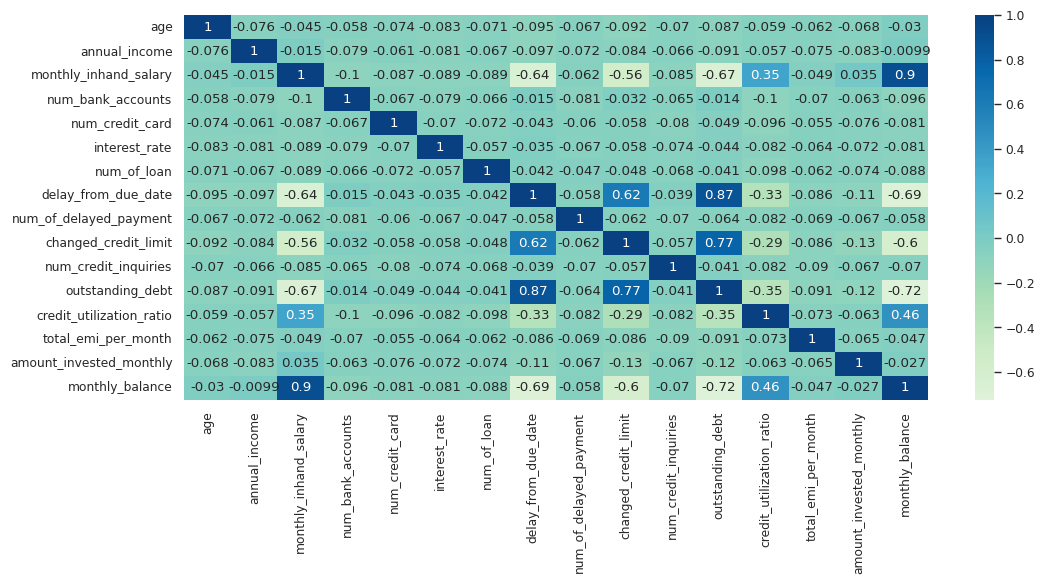

In [43]:
plt.figure(figsize=(12,5))
sns.heatmap(corrmat.corr(),cmap="GnBu",center=0, annot=True)

In [44]:
numeric_cols = dtrain.select_dtypes(exclude = "object").columns
cat_cols = dtrain.select_dtypes(include="object").columns
numeric_cols

Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance'],
      dtype='object')

In [45]:
cat_cols

Index(['occupation', 'credit_mix', 'payment_of_min_amount',
       'payment_behaviour', 'credit_score'],
      dtype='object')

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_dtrain = dtrain[numeric_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = vif_dtrain.columns
vif_data["VIF"] = [variance_inflation_factor(vif_dtrain.values,i) for i in range(len(vif_dtrain.columns))]
vif_data.head(17)

,feature,VIF
0,age,1.03
1,annual_income,1.02
2,monthly_inhand_salary,4.74
3,num_bank_accounts,1.02
4,num_credit_card,1.03
5,interest_rate,1.02
6,num_of_loan,1.03
7,delay_from_due_date,4.45
8,num_of_delayed_payment,1.02
9,changed_credit_limit,4.25


In [47]:
dtrain = dtrain.drop(['monthly_inhand_salary','changed_credit_limit','outstanding_debt','credit_utilization_ratio','monthly_balance'], axis=1)

In [48]:
from sklearn.cluster import KMeans

In [49]:
dtrain = dtrain.dropna(subset=dtrain.columns.values)

In [50]:
dtrain.head()

,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,credit_score
0,23.00,Scientist,19114.12,3.00,4.00,3.00,4.00,3.00,7.00,4.00,Standard,No,49.57,80.42,High_spent_Small_value_payments,Good
1,23.00,Scientist,19114.12,3.00,4.00,3.00,4.00,-1.00,14.00,4.00,Good,No,49.57,118.28,Low_spent_Large_value_payments,Good
3,23.00,Scientist,19114.12,3.00,4.00,3.00,4.00,5.00,4.00,4.00,Good,No,49.57,199.46,Low_spent_Small_value_payments,Good
4,23.00,Scientist,19114.12,3.00,4.00,3.00,4.00,6.00,14.00,4.00,Good,No,49.57,41.42,High_spent_Medium_value_payments,Good
5,23.00,Scientist,19114.12,3.00,4.00,3.00,4.00,8.00,4.00,4.00,Good,No,49.57,62.43,High_spent_Medium_value_payments,Good


In [51]:
dtrain['occupation'].replace(['Scientist','Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],inplace=True)
dtrain['credit_mix'].replace(['Good', 'Standard', 'Bad'],[0,1,2],inplace=True)
dtrain['payment_of_min_amount'].replace(['No', 'Yes'],[0,1],inplace=True)
dtrain['payment_behaviour'].replace(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'],[0,1,2,3,4,5],inplace=True)
dtrain['payment_of_min_amount'].replace(['No', 'Yes','NM'],[0,1,2],inplace=True)
dtrain['credit_score'].replace(['Good', 'Standard', 'Poor'],[0,1,2],inplace=True)


In [104]:
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans.fit(dtrain)

KMeans(max_iter=1000, n_clusters=2, random_state=0)

In [105]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [106]:
k4_labels = kmeans.labels_
dtrain_k4=dtrain.copy()
dtrain_k4['Label']=k4_labels

In [107]:
dtrain_k4.head(10)

,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,credit_score,Label
0,23.00,0,19114.12,3.00,4.00,3.00,4.00,3.00,7.00,4.00,1,0,49.57,80.42,0,0,0
1,23.00,0,19114.12,3.00,4.00,3.00,4.00,-1.00,14.00,4.00,0,0,49.57,118.28,1,0,0
3,23.00,0,19114.12,3.00,4.00,3.00,4.00,5.00,4.00,4.00,0,0,49.57,199.46,3,0,0
4,23.00,0,19114.12,3.00,4.00,3.00,4.00,6.00,14.00,4.00,0,0,49.57,41.42,4,0,0
5,23.00,0,19114.12,3.00,4.00,3.00,4.00,8.00,4.00,4.00,0,0,49.57,62.43,4,0,0
6,23.00,0,19114.12,3.00,4.00,3.00,4.00,3.00,8.00,4.00,0,0,49.57,178.34,3,0,0
7,23.00,0,19114.12,3.00,4.00,3.00,4.00,3.00,6.00,4.00,0,0,49.57,24.79,4,1,0
8,28.00,7,34847.84,2.00,4.00,6.00,1.00,3.00,4.00,2.00,0,0,18.82,104.29,3,1,0
9,28.00,1,34847.84,2.00,4.00,6.00,1.00,7.00,1.00,2.00,0,0,18.82,40.39,5,0,0
10,28.00,1,34847.84,2.00,1385.00,6.00,1.00,3.00,-1.00,2.00,1,0,18.82,58.52,5,1,0


In [108]:
dtrain_k4.Label.value_counts()

0    45852
1      330
Name: Label, dtype: int64

<Axes: xlabel='annual_income', ylabel='age'>

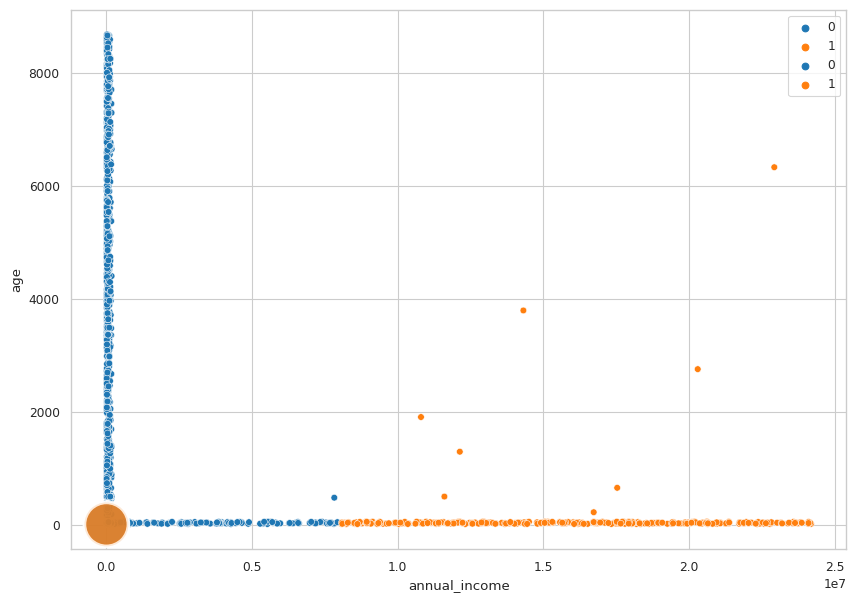

In [109]:
fig, ax=plt.subplots(figsize=(10,7))
sns.scatterplot(ax=ax, x=dtrain_k4.annual_income, y=dtrain_k4['age'], hue=dtrain_k4.Label)
centers = kmeans.cluster_centers_
sns.scatterplot(x = centers[:,1], y = centers[:,1], s=1000, alpha=0.8, hue=range(2))

In [110]:
range_n_clusters=[1,2,3,4,5,6]
scores = []

for i in range_n_clusters:
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(dtrain)
  score = kmeans.inertia_
  scores.append(score)
  print(str(i)+"\t"+str(score))

1	9.133386525232488e+16
2	9477824811280232.0
3	3276552659551035.5
4	1919138579060386.5
5	1152951993049233.5
6	742555490834421.5


Text(0, 0.5, 'Score')

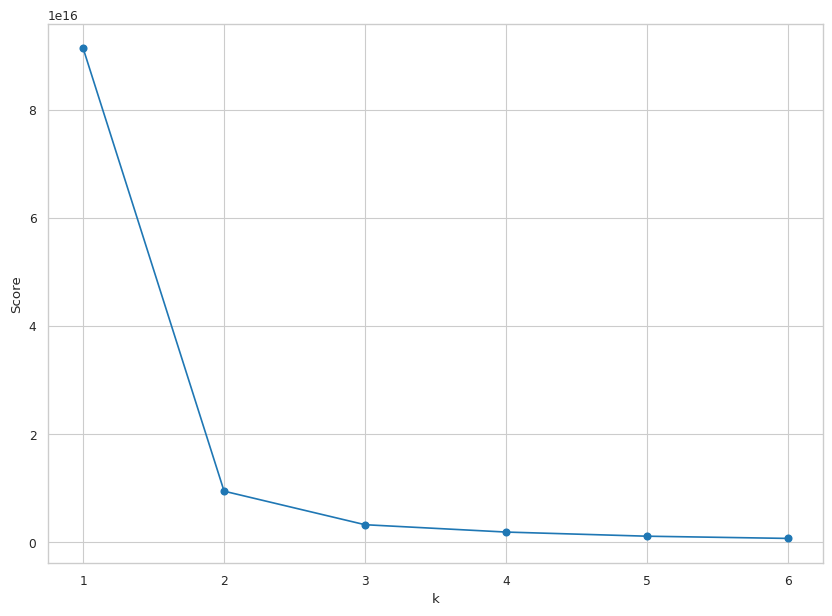

In [111]:
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o')
plt.xlabel("k")
plt.ylabel("Score")

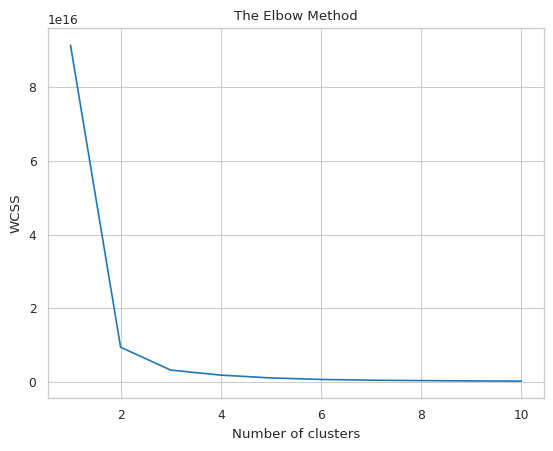

In [112]:
# Using the elbow method to find the optimal number of clusters for dtrain
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dtrain)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [113]:
#for complete input analysis
age = 23 #@param {type:"number"}
occupation =  0#@param {type:"number"}
annual_income = 10909427#@param {type:"number"}
num_bank_accounts = 3#@param {type:"number"}
num_credit_card = 4#@param {type:"number"}
interest_rate = 3#@param {type:"number"}
num_of_loan =4#@param {type:"number"}
delay_from_due_date = 3#@param {type:"number"}
num_of_delayed_payment = 6#@param {type:"number"}
num_credit_inquiries = 4#@param {type:"number"}
credit_mix = 0#@param {type:"number"}
payment_of_min_amount = 0#@param {type:"number"}
total_emi_per_month =  0#@param {type:"number"}
amount_invested_monthly = 27#@param {type:"number"}
payment_behaviour = 4#@param {type:"number"}
credit_score = 3#@param {type:"number"}

predict= kmeans.predict([[age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date, num_of_delayed_payment,num_credit_inquiries, credit_mix, payment_of_min_amount, total_emi_per_month,amount_invested_monthly, payment_behaviour, credit_score  ]])
print(predict)
if predict==[0]:
  print("Customer is sensible")
else:
  print("Custmor is not sensible" )

[2]
Custmor is not sensible


In [117]:
X = dtrain.iloc[:,0:15].values
y = dtrain.iloc[:, 15].values

[[2.30000000e+01 0.00000000e+00 1.91141200e+04 ... 0.00000000e+00
  4.95749492e+01 8.04152954e+01]
 [2.30000000e+01 0.00000000e+00 1.91141200e+04 ... 0.00000000e+00
  4.95749492e+01 1.18280222e+02]
 [2.30000000e+01 0.00000000e+00 1.91141200e+04 ... 0.00000000e+00
  4.95749492e+01 1.99458074e+02]
 ...
 [4.90000000e+01 6.00000000e+00 7.07933800e+04 ... 0.00000000e+00
  5.11255114e+01 3.06038537e+02]
 [4.90000000e+01 6.00000000e+00 7.07933800e+04 ... 0.00000000e+00
  5.11255114e+01 1.35008020e+02]
 [4.90000000e+01 6.00000000e+00 7.07933800e+04 ... 0.00000000e+00
  5.11255114e+01 4.15219785e+02]]


In [165]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 24)

In [166]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [167]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_Random = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
classifier_Random.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [168]:
# Predicting the Test set results
y_pred = classifier_Random.predict(X_test)

In [169]:
y_pred

array([2, 2, 2, ..., 2, 2, 1])

In [170]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 78.36


In [172]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[ 923  339    8]
 [ 282 2908  459]
 [  23  388 1598]]


In [173]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 78.36


In [180]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %.3f' % (precision*100))

Precision: 78.355


In [181]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %.3f' % (recall*100))

Recall: 78.363


In [182]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(y_test, y_pred, average='weighted')
print('F-Measure: %.3f' % (score*100))

F-Measure: 78.351


In [187]:
#for complete input analysis
age = 23 #@param {type:"number"}
occupation =  0#@param {type:"number"}
annual_income = 10907#@param {type:"number"}
num_bank_accounts = 3#@param {type:"number"}
num_credit_card = 4#@param {type:"number"}
interest_rate = 3#@param {type:"number"}
num_of_loan =4#@param {type:"number"}
delay_from_due_date = 3#@param {type:"number"}
num_of_delayed_payment = 6#@param {type:"number"}
num_credit_inquiries = 4#@param {type:"number"}
credit_mix = 0#@param {type:"number"}
payment_of_min_amount = 0#@param {type:"number"}
total_emi_per_month =  0#@param {type:"number"}
amount_invested_monthly = 27#@param {type:"number"}
payment_behaviour = 4#@param {type:"number"}

output=classifier_Random.predict([[age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date, num_of_delayed_payment,num_credit_inquiries, credit_mix, payment_of_min_amount, total_emi_per_month,amount_invested_monthly, payment_behaviour]])
print(output)
if output==[0]:
  print("Customer is sensible")
else:
  print("Custmor is not sensible" )

[2]
Custmor is not sensible


In [188]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [189]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

In [190]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [191]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [207]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm


logreg_eval = evaluate_model(y_test, logreg_pred)
rf_eval = evaluate_model(y_test, rf_pred)
gb_eval = evaluate_model(y_test, gb_pred)

# Compare model performance
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
evaluations = [logreg_eval, rf_eval, gb_eval]

In [208]:

for model, evals in zip(models, evaluations):
    print(f"Model: {model}")
    print(f"Accuracy: {evals[0]}")
    print(f"Precision: {evals[1]}")
    print(f"Recall: {evals[2]}")
    print(f"F1-score: {evals[3]}")
    print(f"Confusion metrix: {evals[4]}")
    print()

Model: Logistic Regression
Accuracy: 0.601905311778291
Precision: 0.5968764949775113
Recall: 0.5398469061507859
F1-score: 0.5477291016014741
Confusion metrix: [[ 635  621   14]
 [ 441 2861  347]
 [ 122 1213  674]]

Model: Random Forest
Accuracy: 0.7847863741339491
Precision: 0.7760650216189187
Recall: 0.7749083590209916
F1-score: 0.7754269957580519
Confusion metrix: [[ 934  329    7]
 [ 278 2915  456]
 [  30  391 1588]]

Model: Gradient Boosting
Accuracy: 0.6825923787528868
Precision: 0.6624009118898341
Recall: 0.6731874411443001
F1-score: 0.6673187470047067
Confusion metrix: [[ 799  442   29]
 [ 417 2529  703]
 [ 115  493 1401]]

